In [314]:
#importing all packages

import pandas as pd
import numpy as np     
import matplotlib.pyplot as plt   
import seaborn as sns
import glob
import os
import json
import geopandas as gpd

import requests            
from datetime import datetime 
        



In [ ]:
#Get all csv files
folder_path = r'C:\Users\rahar\Desktop\DATA 602\Final_Project\Data'
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

In [ ]:
df_list = []
#Turn each csv file into a data frame
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

#Combine them all
combined_df = pd.concat(df_list, ignore_index=True)


C:\Users\rahar\AppData\Local\Temp\ipykernel_16688\2699344439.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\rahar\AppData\Local\Temp\ipykernel_16688\2699344439.py:4: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\rahar\AppData\Local\Temp\ipykernel_16688\2699344439.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\rahar\AppData\Local\Temp\ipykernel_16688\2699344439.py:4: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\rahar\AppData\Local\Temp\ipykernel_16688\2699344439.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [ ]:
#Get additional location information
loc_df = pd.read_csv(r'C:\Users\rahar\Desktop\DATA 602\Final_Project\locaddr.csv')
nyc_loc = pd.read_csv(r'C:\Users\rahar\Desktop\DATA 602\Final_Project\NYC_ZipCodes.csv')

In [ ]:
nyc_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Zip      480 non-null    int64 
 1   Borough  480 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.6+ KB


In [ ]:
#Only keep needed columns
loc_df = loc_df[['RCRA_ID', 'LOCATION_ZIP']]
loc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172546 entries, 0 to 172545
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   RCRA_ID       172546 non-null  object
 1   LOCATION_ZIP  153911 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


In [ ]:
combined_df.columns

Index(['MANIFEST_TRACKING_NUM', 'PAGE_NUM', 'LINE_ITEM_NUM', 'GEN_RCRA_ID',
       'GEN_SIGN_DATE', 'TSDF_RCRA_ID', 'TSDF_SIGN_DATE',
       'TRANSPORTER_1_RCRA_ID', 'TRANSPORTER_1_SIGN_DATE',
       'TRANSPORTER_2_RCRA_ID', 'TRANSPORTER_2_SIGN_DATE', 'IMPORT_IND',
       'EXPORT_IND', 'DISCR_QUANTITY_IND', 'DISCR_TYPE_IND',
       'DISCR_RESIDUE_IND', 'DISCR_PARTIAL_REJECT_IND',
       'DISCR_FULL_REJECT_IND', 'MANIFEST_REF_NUM', 'ALT_FACILITY_RCRA_ID',
       'ALT_FACILITY_SIGN_DATE', 'NUM_OF_CONTAINERS', 'CONTAINER_TYPE_CODE',
       'WASTE_QTY', 'UNIT_OF_MEASURE', 'SPECIFIC_GRAVITY',
       'HANDLING_TYPE_CODE', 'MGMT_METHOD_TYPE_CODE', 'WASTE_CODE_1',
       'WASTE_CODE_2', 'WASTE_CODE_3', 'WASTE_CODE_4', 'WASTE_CODE_5',
       'WASTE_CODE_6'],
      dtype='object')

In [ ]:
#Convert key columns to string type
loc_df['RCRA_ID'] = loc_df['RCRA_ID'].astype(str)
combined_df['GEN_RCRA_ID'] = combined_df['GEN_RCRA_ID'].astype(str)
nyc_loc['Zip'] = nyc_loc['Zip'].astype(str)


In [ ]:
#Merge data_df with loc_subset to get generator location info
combined_df = combined_df.merge(
    loc_df,
    how='left',          
    left_on='GEN_RCRA_ID',
    right_on='RCRA_ID'
)

#merge with NYC zip code list to label NYC locations
combined_df = combined_df.merge(
    nyc_loc,
    how='left',          
    left_on='LOCATION_ZIP',
    right_on='Zip'
)

In [ ]:
#Filter data to only contain NYC generator locations
data_df = combined_df.dropna(subset=['Borough'])


In [ ]:
data_df.columns

Index(['MANIFEST_TRACKING_NUM', 'PAGE_NUM', 'LINE_ITEM_NUM', 'GEN_RCRA_ID',
       'GEN_SIGN_DATE', 'TSDF_RCRA_ID', 'TSDF_SIGN_DATE',
       'TRANSPORTER_1_RCRA_ID', 'TRANSPORTER_1_SIGN_DATE',
       'TRANSPORTER_2_RCRA_ID', 'TRANSPORTER_2_SIGN_DATE', 'IMPORT_IND',
       'EXPORT_IND', 'DISCR_QUANTITY_IND', 'DISCR_TYPE_IND',
       'DISCR_RESIDUE_IND', 'DISCR_PARTIAL_REJECT_IND',
       'DISCR_FULL_REJECT_IND', 'MANIFEST_REF_NUM', 'ALT_FACILITY_RCRA_ID',
       'ALT_FACILITY_SIGN_DATE', 'NUM_OF_CONTAINERS', 'CONTAINER_TYPE_CODE',
       'WASTE_QTY', 'UNIT_OF_MEASURE', 'SPECIFIC_GRAVITY',
       'HANDLING_TYPE_CODE', 'MGMT_METHOD_TYPE_CODE', 'WASTE_CODE_1',
       'WASTE_CODE_2', 'WASTE_CODE_3', 'WASTE_CODE_4', 'WASTE_CODE_5',
       'WASTE_CODE_6', 'RCRA_ID', 'LOCATION_ZIP', 'Zip', 'Borough'],
      dtype='object')

In [ ]:
#Drop columns
columns_to_drop = [
    'PAGE_NUM',
    'LINE_ITEM_NUM',
    'TSDF_RCRA_ID',
    'TSDF_SIGN_DATE',
    'TRANSPORTER_1_RCRA_ID',
    'TRANSPORTER_1_SIGN_DATE',
    'TRANSPORTER_2_RCRA_ID',
    'TRANSPORTER_2_SIGN_DATE',
    'IMPORT_IND',
    'EXPORT_IND',
    'DISCR_QUANTITY_IND',
    'DISCR_TYPE_IND',
    'DISCR_RESIDUE_IND',
    'DISCR_PARTIAL_REJECT_IND',
    'DISCR_FULL_REJECT_IND',
    'MANIFEST_REF_NUM',
    'ALT_FACILITY_RCRA_ID',
    'ALT_FACILITY_SIGN_DATE',
    'NUM_OF_CONTAINERS',
    'HANDLING_TYPE_CODE',
    'LOCATION_ZIP', 'WASTE_CODE_1',
       'WASTE_CODE_2', 'WASTE_CODE_3', 'WASTE_CODE_4', 'WASTE_CODE_5',
       'WASTE_CODE_6','CONTAINER_TYPE_CODE','MGMT_METHOD_TYPE_CODE'
]

# Drop the columns from combined_df
data_df.drop(columns=columns_to_drop, inplace=True)




C:\Users\rahar\AppData\Local\Temp\ipykernel_16688\1226774122.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
#Look at columns with null values
null_counts = data_df.isnull().sum()

#Display the number of null values in each column
print("Number of null values in each column:")
print(null_counts)


Number of null values in each column:
MANIFEST_TRACKING_NUM     0
GEN_RCRA_ID               0
GEN_SIGN_DATE             0
WASTE_QTY                10
UNIT_OF_MEASURE          10
SPECIFIC_GRAVITY         10
RCRA_ID                   0
Zip                       0
Borough                   0
dtype: int64


In [ ]:
#Not many null values, so I will drop them
data_df = data_df.dropna()

In [ ]:
# Initialize the new column
data_df['WASTE_QTY_L'] = np.nan

# Masks for each unit type
mask_G = data_df['UNIT_OF_MEASURE'] == 'G'
mask_K = data_df['UNIT_OF_MEASURE'] == 'K'
mask_L = data_df['UNIT_OF_MEASURE'] == 'L'
mask_P = data_df['UNIT_OF_MEASURE'] == 'P'
mask_T = data_df['UNIT_OF_MEASURE'] == 'T'
mask_Y = data_df['UNIT_OF_MEASURE'] == 'Y'

# Gallons to liters
data_df.loc[mask_G, 'WASTE_QTY_L'] = data_df.loc[mask_G, 'WASTE_QTY'] * 3.785

# Kilograms to liters using specific gravity
mask_K_valid = mask_K & data_df['SPECIFIC_GRAVITY'].notnull() & (data_df['SPECIFIC_GRAVITY'] != 0)
data_df.loc[mask_K_valid, 'WASTE_QTY_L'] = data_df.loc[mask_K_valid, 'WASTE_QTY'] / data_df.loc[mask_K_valid, 'SPECIFIC_GRAVITY']

# Liters (no conversion needed)
data_df.loc[mask_L, 'WASTE_QTY_L'] = data_df.loc[mask_L, 'WASTE_QTY']

# Pounds to liters via kilograms
mask_P_valid = mask_P & data_df['SPECIFIC_GRAVITY'].notnull() & (data_df['SPECIFIC_GRAVITY'] != 0)
data_df.loc[mask_P_valid, 'WASTE_QTY_L'] = (data_df.loc[mask_P_valid, 'WASTE_QTY'] * 0.453592) / data_df.loc[mask_P_valid, 'SPECIFIC_GRAVITY']

# Tons to liters via kilograms
mask_T_valid = mask_T & data_df['SPECIFIC_GRAVITY'].notnull() & (data_df['SPECIFIC_GRAVITY'] != 0)
data_df.loc[mask_T_valid, 'WASTE_QTY_L'] = (data_df.loc[mask_T_valid, 'WASTE_QTY'] * 907.185) / data_df.loc[mask_T_valid, 'SPECIFIC_GRAVITY']

# Cubic yards to liters
data_df.loc[mask_Y, 'WASTE_QTY_L'] = data_df.loc[mask_Y, 'WASTE_QTY'] * 764.555


In [ ]:
data_df.info()

#Changing columns to the rigth data type
data_df['GEN_SIGN_DATE'] = pd.to_datetime(data_df['GEN_SIGN_DATE'], errors='coerce')
data_df['UNIT_OF_MEASURE'] = data_df['UNIT_OF_MEASURE'].astype(str)
data_df['RCRA_ID'] = data_df['RCRA_ID'].astype(str)
data_df['Zip'] = data_df['Zip'].astype(str)
data_df['Borough'] = data_df['Borough'].astype(str)
data_df['WASTE_QTY_L'] = pd.to_numeric(data_df['WASTE_QTY_L'], errors='coerce')
data_df['WASTE_QTY_L'] = data_df['WASTE_QTY_L']
data_df.rename(columns={'WASTE_QTY_L': 'WASTE_QTY_Thousand_L'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 372342 entries, 6696 to 896629
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   MANIFEST_TRACKING_NUM  372342 non-null  object 
 1   GEN_RCRA_ID            372342 non-null  object 
 2   GEN_SIGN_DATE          372342 non-null  object 
 3   WASTE_QTY              372342 non-null  float64
 4   UNIT_OF_MEASURE        372342 non-null  object 
 5   SPECIFIC_GRAVITY       372342 non-null  float64
 6   RCRA_ID                372342 non-null  object 
 7   Zip                    372342 non-null  object 
 8   Borough                372342 non-null  object 
 9   WASTE_QTY_L            372342 non-null  float64
dtypes: float64(3), object(7)
memory usage: 31.2+ MB


In [ ]:
data_df.shape

(372342, 10)

In [ ]:
#Remove duplicates
data_df.drop_duplicates(inplace=True)

In [ ]:
#Removing outliers
#Getting Q1, Q3, and IQR
Q1 = data_df['WASTE_QTY_Thousand_L'].quantile(0.25)
Q3 = data_df['WASTE_QTY_Thousand_L'].quantile(0.75)
IQR = Q3 - Q1
#Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#use upper and lower bond to get outliers
outliers = (data_df['WASTE_QTY_Thousand_L'] < lower_bound) | (data_df['WASTE_QTY_Thousand_L'] > upper_bound)
#Remove outliers
data_df = data_df[~outliers].reset_index(drop=True)


In [ ]:
#Waste quantity by year
data_df['Year'] = data_df['GEN_SIGN_DATE'].dt.year
annual_waste = data_df.groupby('Year')['WASTE_QTY_Thousand_L'].sum().reset_index()

print(annual_waste)

   Year  WASTE_QTY_Thousand_L
0  2014             7,050,503
1  2015             3,508,609
2  2016             1,212,000
3  2017             1,182,570
4  2018             3,051,490


In [ ]:
#Waste quanity percentage change over year
annual_waste['Pct_Change'] = annual_waste['WASTE_QTY_Thousand_L'].pct_change() * 100
print(annual_waste)

   Year  WASTE_QTY_Thousand_L  Pct_Change
0  2014             7,050,503         NaN
1  2015             3,508,609         -50
2  2016             1,212,000         -65
3  2017             1,182,570          -2
4  2018             3,051,490         158


In [ ]:
#Waste generation by borough and year
borough_yearly_waste = data_df.groupby(['Borough', 'Year'])['WASTE_QTY_Thousand_L'].sum().reset_index()
print(borough_yearly_waste)


      Borough  Year  WASTE_QTY_Thousand_L
0       Bronx  2014               636,927
1       Bronx  2015               308,259
2       Bronx  2016               121,358
3       Bronx  2017               127,000
4       Bronx  2018             1,939,677
5    Brooklyn  2014             1,983,371
6    Brooklyn  2015             1,083,701
7    Brooklyn  2016               254,727
8    Brooklyn  2017               262,046
9    Brooklyn  2018               255,524
10  Manhattan  2014             2,267,173
11  Manhattan  2015             1,170,963
12  Manhattan  2016               413,230
13  Manhattan  2017               380,782
14  Manhattan  2018               424,441
15     Queens  2014             2,103,499
16     Queens  2015               898,712
17     Queens  2016               391,879
18     Queens  2017               382,672
19     Queens  2018               384,889
20     Staten  2014                59,533
21     Staten  2015                46,973
22     Staten  2016               

In [ ]:
#Borough that produces the most waste
total_by_borough = data_df.groupby('Borough')['WASTE_QTY_Thousand_L'].sum().sort_values(ascending=False)
print(total_by_borough)


Borough
Manhattan   4,656,589
Queens      4,161,652
Brooklyn    3,839,370
Bronx       3,133,221
Staten        214,341
Name: WASTE_QTY_Thousand_L, dtype: float64


In [ ]:
#Summary stats
waste_qty_stats = data_df['WASTE_QTY_Thousand_L'].describe()
print(waste_qty_stats)


count   148,964
mean        107
std         137
min           0
25%           5
50%          41
75%         189
max         586
Name: WASTE_QTY_Thousand_L, dtype: float64


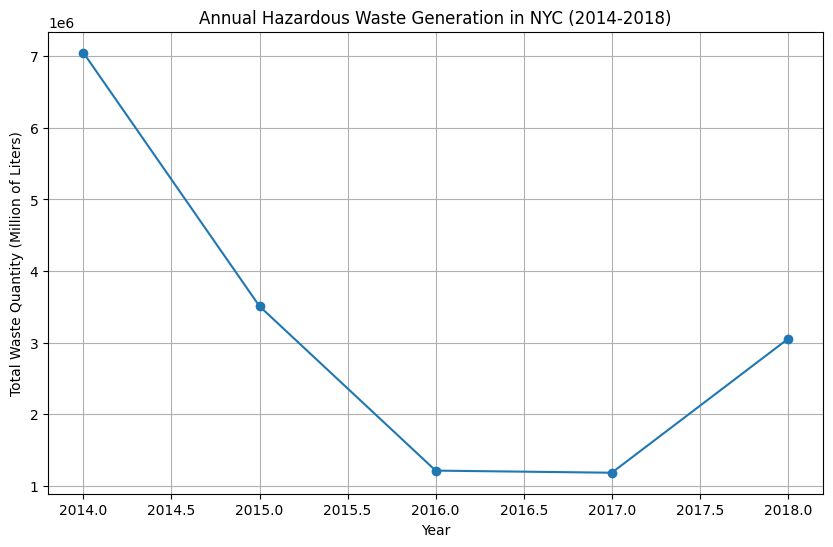

In [ ]:
#Waste generation by year
plt.figure(figsize=(10, 6))
plt.plot(annual_waste['Year'], annual_waste['WASTE_QTY_Thousand_L'], marker='o')
plt.title('Annual Hazardous Waste Generation in NYC (2014-2018)')
plt.xlabel('Year')
plt.ylabel('Total Waste Quantity (Million of Liters)')
plt.grid(True)
plt.show()


C:\Users\rahar\AppData\Local\Temp\ipykernel_16688\3374711542.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


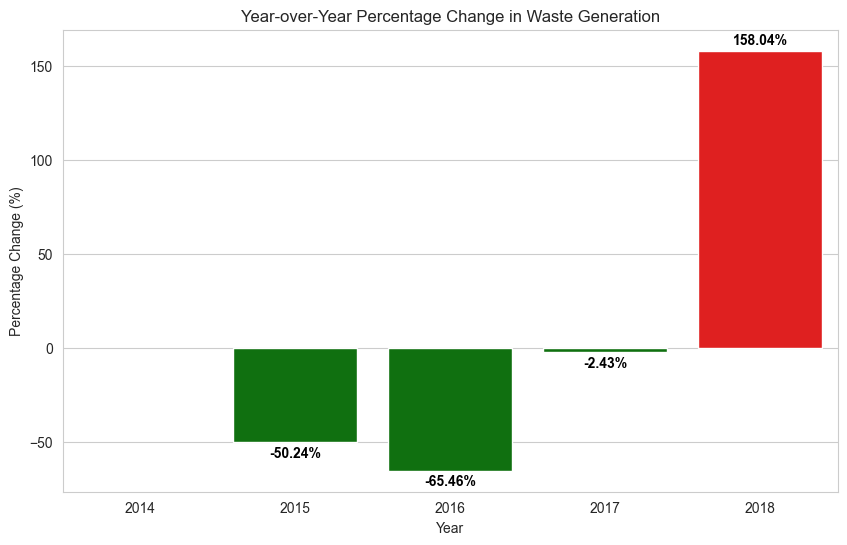

In [ ]:
sns.set_style("whitegrid")
#List of colors based on 'Pct_Change' values
colors = ['green' if val < 0 else 'red' for val in annual_waste['Pct_Change']]
#Create the barplot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='Year',
    y='Pct_Change',
    data=annual_waste,
    palette=colors,
    dodge=False
)

#Adding data labels to each bar
for index, row in annual_waste.iterrows():
    pct_change = row['Pct_Change']
    year = row['Year']
    if pd.notnull(pct_change):
        barplot.text(
            x=index,
            y=pct_change + (2 if pct_change >= 0 else -2),
            s=f"{pct_change:.2f}%",
            ha='center',
            va='bottom' if pct_change >= 0 else 'top',
            color='black',
            fontweight='bold'
        )


plt.title('Year-over-Year Percentage Change in Waste Generation')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.legend([], [], frameon=False)
plt.show()


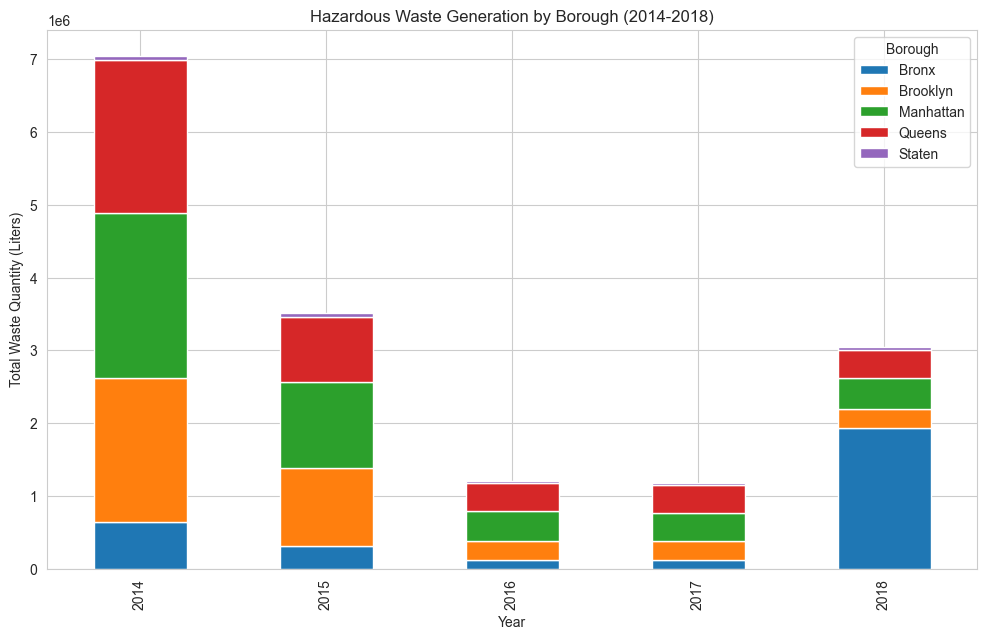

In [ ]:
#Waste generation by borough
pivot_borough_year = borough_yearly_waste.pivot(index='Year', columns='Borough', values='WASTE_QTY_Thousand_L')

pivot_borough_year.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Hazardous Waste Generation by Borough (2014-2018)')
plt.xlabel('Year')
plt.ylabel('Total Waste Quantity (Liters)')
plt.legend(title='Borough')
plt.show()


Plotting average waste generation by zipcode